In [1]:
import json
import time

import pandas as pd
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier

from tools import (Modelisation, SearchCV, best_score_CV, datasets,
                   graph_2scores_CV, graph_2scores_CV_comp, graph_3scores_CV,
                   graph_param_CV, restauration_CV, PDF)

pdf = PDF('output/model_decision_tree/')

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df.shape

(1610494, 48)

**Définition des variables quantitatives, des variables catégorielles et des datasets :**

In [3]:
datasets_df = datasets(df)
X_quant = datasets_df['X_quant']
X_cat = datasets_df['X_cat']
X = datasets_df['X']
y = datasets_df['y']

Columns_quant : default
Columns_cat : default
drop : if_binary

Nombre de variables pour X_quant : 13



Index(['contextid', 'campaignctrlast24h', 'dayssincelastvisitdouble',
       'ltf_nbglobaldisplay_4w', 'ltf_nbpartnerdisplayssincelastclick',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'display_size',
       'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 56



Index(['display_env_app_android', 'display_env_app_ios', 'display_env_other',
       'display_env_web', 'target_env_2', 'campaignscenario_0',
       'campaignscenario_5', 'campaignscenario_6', 'campaignscenario_11',
       'campaignscenario_12', 'campaignscenario_13', 'campaignscenario_17',
       'campaignvertical_14.0', 'campaignvertical_20.0',
       'campaignvertical_23.0', 'campaignvertical_129.0',
       'campaignvertical_200002.0', 'is_interstitial_True',
       'device_type_Android', 'device_type_Desktop',
       'device_type_Desktop - Safari', 'device_type_Mobile - Other',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_Friday',
       'weekday_Monday', 'weekday_Satur


Nombre de variables pour X : 69


# Decision tree
## 1. Modèle brut
### 1.1. Variables quantitatives

Export PDF : output/model_decision_tree/00.pdf



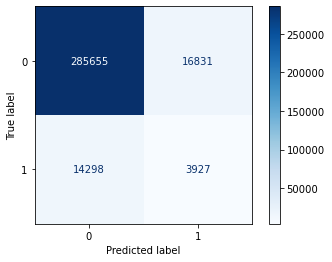

f1 : 0.2015
f3 : 0.2125
f5 : 0.2143
recall : 0.2155
negative predictive value : 0.9523
precision : 0.1892
roc_auc : 0.5800
training time : 15.84s
prediction time : 0.13s


In [4]:
m = Modelisation(X_quant, y, DecisionTreeClassifier())
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

Export PDF : output/model_decision_tree/01.pdf



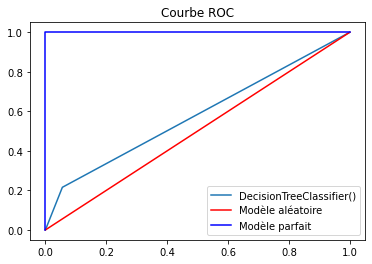

In [5]:
m.show_ROC(pdf=pdf)

In [6]:
m.show_attributes()

max_depth : 54
n_leaves : 91754
node_count : 183507


/home/headless/work/statapp/tools.py:196: RuntimeWarning: invalid value encountered in long_scalars
  Precision = TP / (TP + FP)


Export PDF : output/model_decision_tree/02.pdf



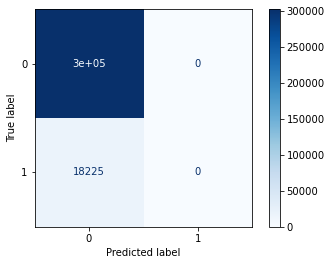

f1 : nan
f3 : nan
f5 : nan
recall : 0.0000
negative predictive value : 0.9432
precision : nan
roc_auc : 0.7373
training time : 1.808s
prediction time : 0.025s


In [7]:
m = Modelisation(X_quant, y, DecisionTreeClassifier(max_depth=2))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

In [8]:
m.show_attributes()

max_depth : 2
n_leaves : 4
node_count : 7


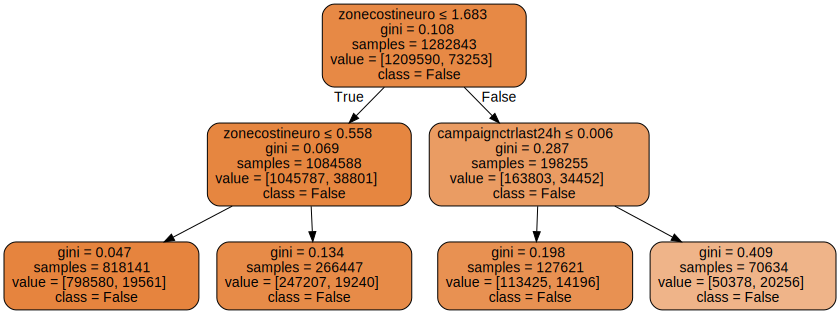

In [9]:
m.plot_tree()

### 1.2. Variables catégorielles

Export PDF : output/model_decision_tree/03.pdf



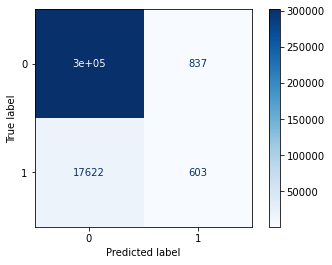

f1 : 0.0613
f3 : 0.0364
f5 : 0.0343
recall : 0.0331
negative predictive value : 0.9448
precision : 0.4188
roc_auc : 0.6563
training time : 13.807s
prediction time : 0.138s


In [10]:
m = Modelisation(X_cat, y, DecisionTreeClassifier())
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

In [11]:
m.show_attributes()

max_depth : 45
n_leaves : 18782
node_count : 37563


### 1.3. Variables quantitatives + catégorielles

Export PDF : output/model_decision_tree/04.pdf



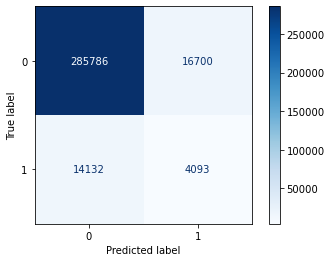

f1 : 0.2098
f3 : 0.2215
f5 : 0.2234
recall : 0.2246
negative predictive value : 0.9529
precision : 0.1968
roc_auc : 0.5847
training time : 36.82s
prediction time : 0.278s


In [12]:
m = Modelisation(X, y, DecisionTreeClassifier())
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

In [13]:
m.show_attributes()

max_depth : 57
n_leaves : 87171
node_count : 174341


# Random Forest

## 1. Modèle brut

Export PDF : output/model_decision_tree/05.pdf



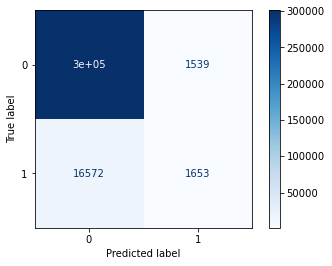

f1 : 0.1544
f3 : 0.0989
f5 : 0.0937
recall : 0.0907
negative predictive value : 0.9478
precision : 0.5179
roc_auc : 0.7353
training time : 5.862s
prediction time : 0.333s


In [14]:
m = Modelisation(X, y, RandomForestClassifier(n_estimators=10, n_jobs=-1))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

Export PDF : output/model_decision_tree/06.pdf



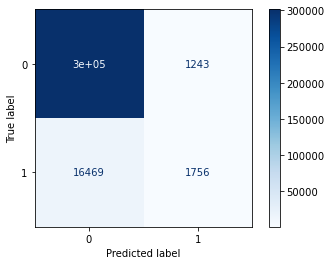

f1 : 0.1655
f3 : 0.1051
f5 : 0.0995
recall : 0.0964
negative predictive value : 0.9482
precision : 0.5855
roc_auc : 0.8141
training time : 35.705s
prediction time : 1.062s


In [15]:
m = Modelisation(X, y, RandomForestClassifier(n_estimators=100, n_jobs=-1))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

Export PDF : output/model_decision_tree/07.pdf



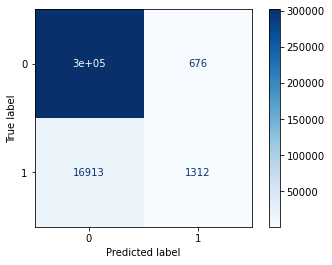

f1 : 0.1298
f3 : 0.0790
f5 : 0.0745
recall : 0.0720
negative predictive value : 0.9469
precision : 0.6600
roc_auc : 0.8360
training time : 33.449s
prediction time : 0.7s


In [16]:
m = Modelisation(X, y, RandomForestClassifier(min_samples_leaf=15, n_estimators=100, n_jobs=-1))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

## 2. Tuning des hyperparamètres avec GridSearchCV

In [17]:
model = RandomForestClassifier()

cv_params = {
    "bootstrap": [False, True],
    "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "max_features": ['sqrt', 'log2'],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [50, 100, 200, 400, 600, 800, 1000, 1500],
    "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:6}, {0:1, 1:8},
                     {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}, {0:1, 1:16}, {0:1, 1:18},
                     {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, {0:1, 1:26}, {0:1, 1:28},
                     {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

57024


In [18]:
# SearchCV(model, cv_params, data_frac=0.02, random=True, n_iter=5000, random_state=1234, n_jobs=28)

In [19]:
dico, results = restauration_CV('Forest_CV_Randomized5000_57024_0.02')

model : RandomForestClassifier()
model_name : Forest
type : RandomizedSearchCV
len_grid : 57024
n_iter : 5000
columns_quant : default
columns_cat : default
drop : if_binary
data_frac : 0.02
n_jobs : 28
temps : 8h, 2min, 10.182s
params : {'bootstrap': [False, True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1500], 'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 6}, {0: 1, 1: 8}, {0: 1, 1: 10}, {0: 1, 1: 12}, {0: 1, 1: 14}, {0: 1, 1: 16}, {0: 1, 1: 18}, {0: 1, 1: 20}, {0: 1, 1: 22}, {0: 1, 1: 24}, {0: 1, 1: 26}, {0: 1, 1: 28}, {0: 1, 1: 30}, {0: 1, 1: 32}]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, beta=3), 'f5': make_scorer(fbeta_score, beta=5)}


Export PDF : output/model_decision_tree/08.pdf



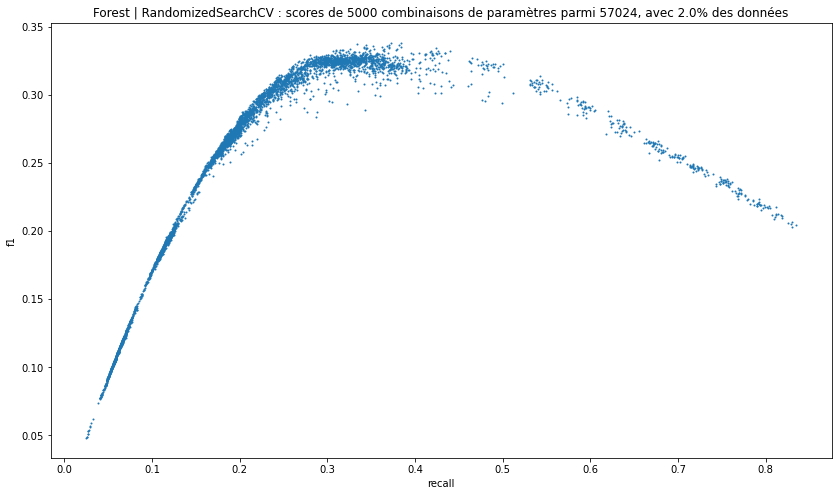

In [20]:
graph_2scores_CV(dico, results, 'recall', 'f1', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/09.pdf



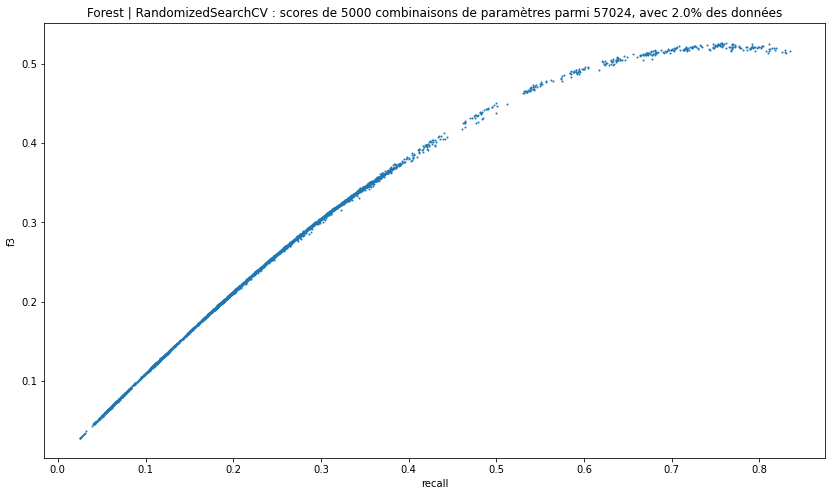

In [21]:
graph_2scores_CV(dico, results, 'recall', 'f3', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/10.pdf



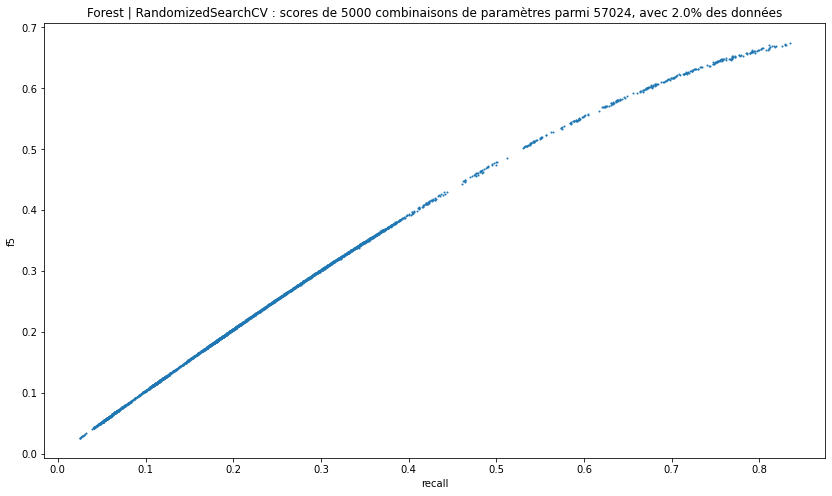

In [22]:
graph_2scores_CV(dico, results, 'recall', 'f5', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/11.pdf



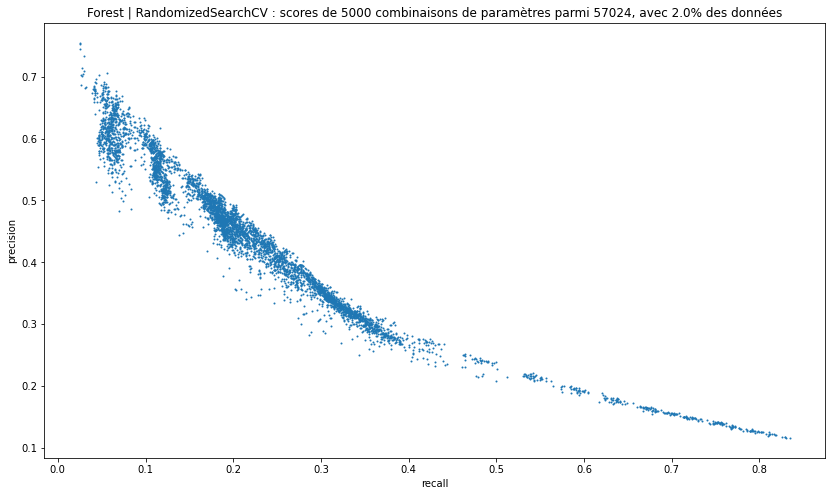

In [23]:
graph_2scores_CV(dico, results, 'recall', 'precision', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/12.pdf



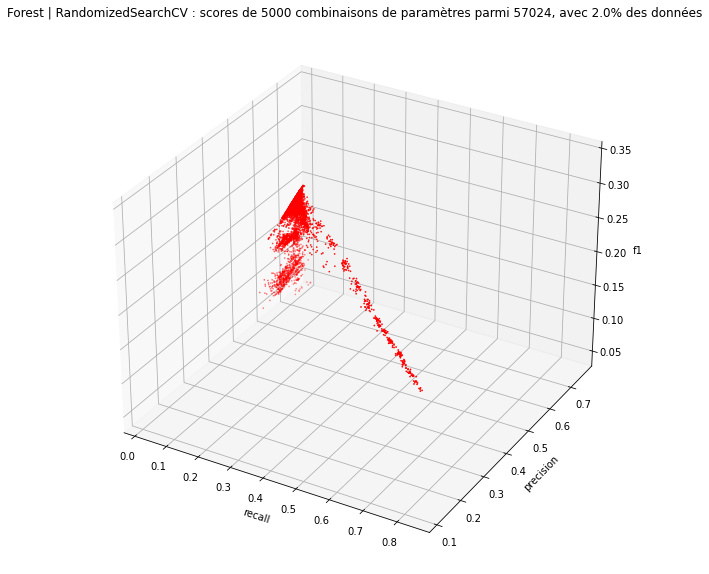

In [24]:
graph_3scores_CV(dico, results, 'recall', 'precision', 'f1', s=0.5, pdf=pdf)

Export PDF : output/model_decision_tree/13.pdf



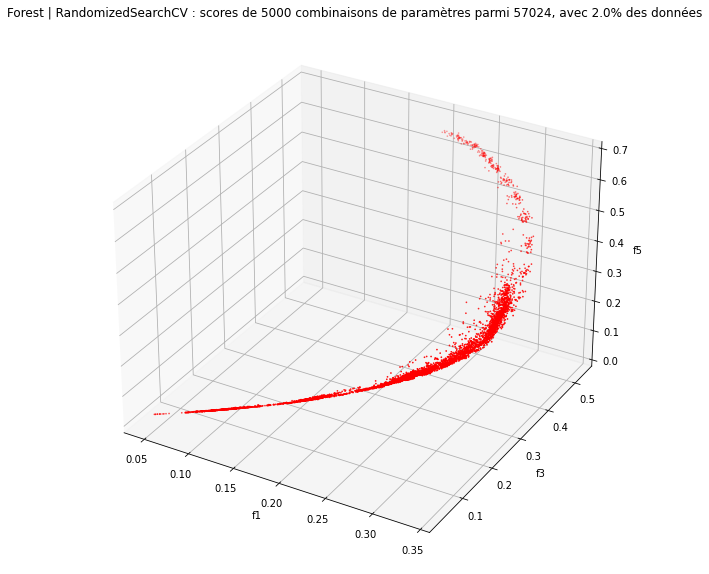

In [25]:
graph_3scores_CV(dico, results, 'f1', 'f3', 'f5', s=0.5, pdf=pdf)

Export PDF : output/model_decision_tree/14.pdf



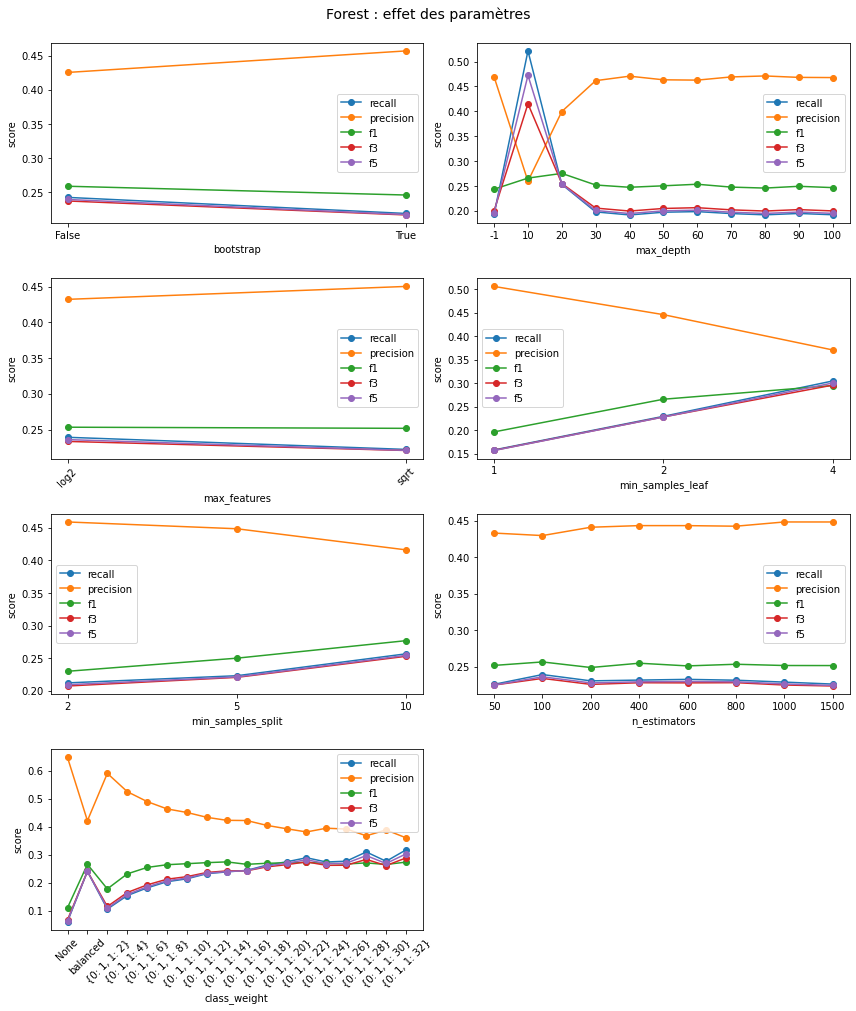

In [26]:
graph_param_CV(dico, results, ncols=2, height=3.5, width=6, pdf=pdf)

In [27]:
best_params = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
2232,43.166859,8.159292,1.277046,0.284211,800,10,1,sqrt,10,"{0: 1, 1: 26}",...,4918,0.238166,0.003047,3453,0.526939,0.003473,1,0.647802,0.004159,58
1533,40.709451,2.516572,1.970807,0.105237,1000,2,4,sqrt,10,"{0: 1, 1: 32}",...,4934,0.235739,0.003003,3481,0.526652,0.006201,2,0.650079,0.007792,51
3344,45.54324,6.709797,1.352534,0.21848,1000,2,4,sqrt,10,"{0: 1, 1: 26}",...,4924,0.236948,0.00338,3467,0.52618,0.006651,3,0.647855,0.008355,57
3859,11.303596,2.255403,0.589007,0.143508,400,10,4,log2,10,"{0: 1, 1: 28}",...,4936,0.23505,0.00448,3489,0.525121,0.00876,4,0.648207,0.010809,56
1448,56.003621,3.227495,2.388133,0.447929,1500,10,4,sqrt,10,"{0: 1, 1: 30}",...,4916,0.239735,0.003192,3439,0.525093,0.006824,5,0.642814,0.008543,77
3416,36.624873,6.71249,1.013457,0.086323,800,10,2,sqrt,10,"{0: 1, 1: 26}",...,4920,0.237497,0.002661,3462,0.525046,0.005223,6,0.645243,0.006526,69
3619,9.324254,1.694134,0.282392,0.063798,200,10,2,sqrt,10,"{0: 1, 1: 26}",...,4919,0.23769,0.003864,3460,0.525017,0.006717,7,0.644979,0.007828,70
2682,17.24144,0.924474,0.539476,0.126815,400,2,1,sqrt,10,"{0: 1, 1: 28}",...,4944,0.23149,0.003894,3522,0.524996,0.00571,8,0.652238,0.005699,45
2611,30.737333,5.27216,0.990793,0.214175,600,2,4,sqrt,10,"{0: 1, 1: 26}",...,4925,0.236769,0.002821,3471,0.524958,0.004078,9,0.645923,0.004402,65
2597,9.279645,1.716058,0.317646,0.087973,200,5,4,sqrt,10,"{0: 1, 1: 32}",...,4983,0.217534,0.004848,3611,0.524837,0.00891,10,0.670603,0.01012,5


Meilleure combinaison de paramètres pour f3 :


{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': {0: 1, 1: 26},
 'bootstrap': False}

In [28]:
best_params['n_jobs'] = -1
best_params['n_estimators'] = 400
PARAMS = {}
PARAMS[dico['model_name']] = best_params

Export PDF : output/model_decision_tree/15.pdf



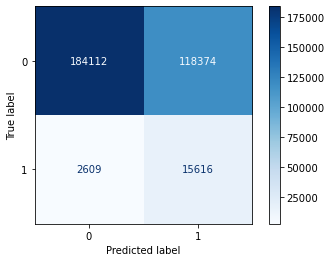

f1 : 0.2052
f3 : 0.5240
f5 : 0.6886
recall : 0.8568
negative predictive value : 0.9860
precision : 0.1165
roc_auc : 0.8274
training time : 2min, 1.335s
prediction time : 1.231s


In [29]:
m = Modelisation(X, y, RandomForestClassifier(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

SCORES = []
metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

## 3. RandomForest avec oversampling

### 3.1. GridSearchCV avec RandomOverSampler

In [30]:
over = RandomOverSampler(random_state=1234)

pipeline = Pipeline_imb([('over', over),
                         ('model', RandomForestClassifier())
                         ])

cv_params = {
    "over__sampling_strategy": [0.1, 0.2, 0.4, 0.6, 0.8, 1],
    "model__bootstrap": [False, True],
    "model__max_depth": [10, 20, 30, 40, 50, None],
    "model__max_features": ['sqrt', 'log2'],
    "model__min_samples_leaf": [1, 2, 4],
    "model__min_samples_split": [2, 5, 10],
    "model__n_estimators": [50, 100, 200, 400, 600, 800, 1000],
    "model__class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:12}, 
                            {0:1, 1:16}, {0:1, 1:18}, {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, 
                            {0:1, 1:26}, {0:1, 1:28}, {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

136080


In [31]:
# SearchCV(pipeline, cv_params, data_frac=0.02, random=True, n_iter=10000, random_state=1234, n_jobs=28)

In [32]:
dico, results = restauration_CV('RandomOver_Forest_CV_Randomized10000_136080_0.02')

model : Pipeline(steps=[('over', RandomOverSampler(random_state=1234)),
                ('model', RandomForestClassifier())])
model_name : RandomOver_Forest
type : RandomizedSearchCV
len_grid : 136080
n_iter : 10000
columns_quant : default
columns_cat : default
drop : if_binary
data_frac : 0.02
n_jobs : 28
temps : 18h, 21min, 50.539s
params : {'over__sampling_strategy': [0.1, 0.2, 0.4, 0.6, 0.8, 1], 'model__bootstrap': [False, True], 'model__max_depth': [10, 20, 30, 40, 50, None], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [1, 2, 4], 'model__min_samples_split': [2, 5, 10], 'model__n_estimators': [50, 100, 200, 400, 600, 800, 1000], 'model__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 8}, {0: 1, 1: 12}, {0: 1, 1: 16}, {0: 1, 1: 18}, {0: 1, 1: 20}, {0: 1, 1: 22}, {0: 1, 1: 24}, {0: 1, 1: 26}, {0: 1, 1: 28}, {0: 1, 1: 30}, {0: 1, 1: 32}]}
scoring : {'recall': 'recall', 'precision': 'precision', 'f1': 'f1', 'f3': make_scorer(fbeta_score, 

Export PDF : output/model_decision_tree/16.pdf



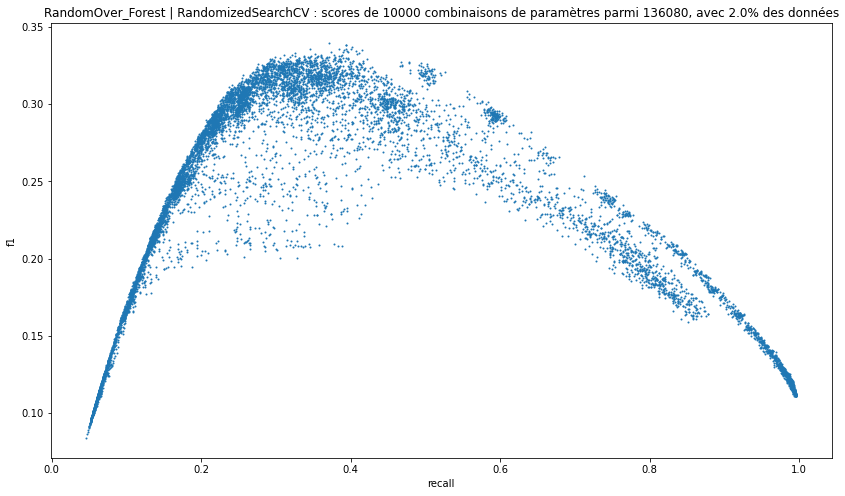

In [33]:
graph_2scores_CV(dico, results, 'recall', 'f1', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/17.pdf



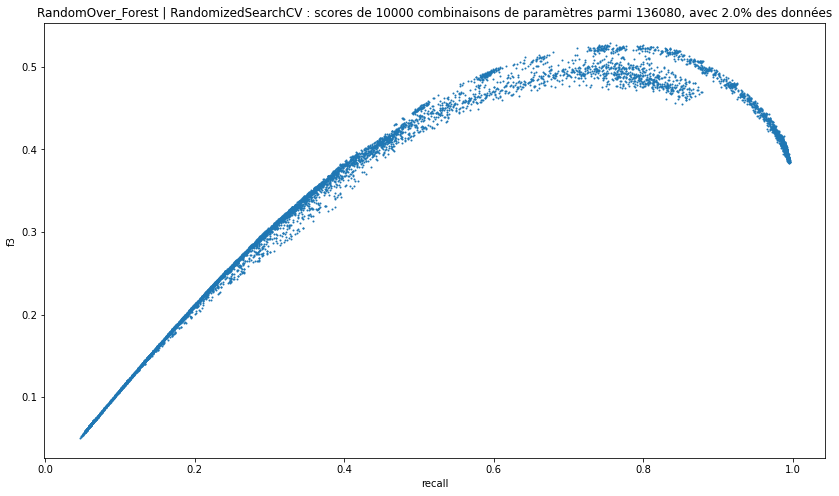

In [34]:
graph_2scores_CV(dico, results, 'recall', 'f3', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/18.pdf



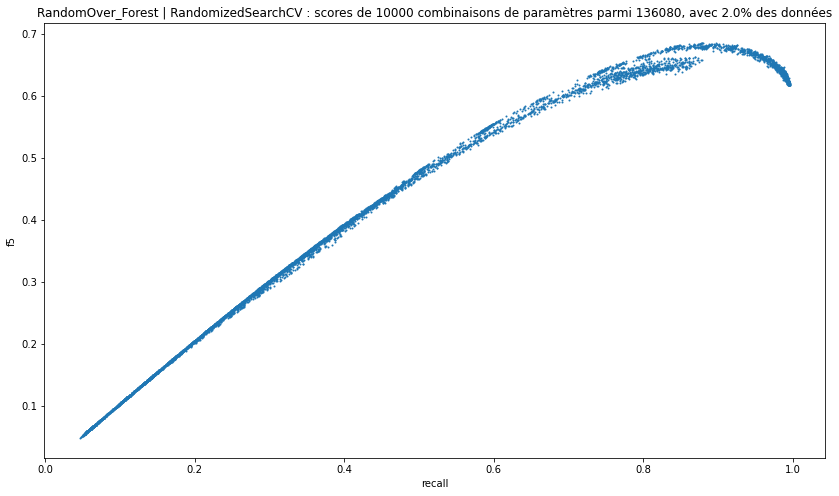

In [35]:
graph_2scores_CV(dico, results, 'recall', 'f5', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/19.pdf



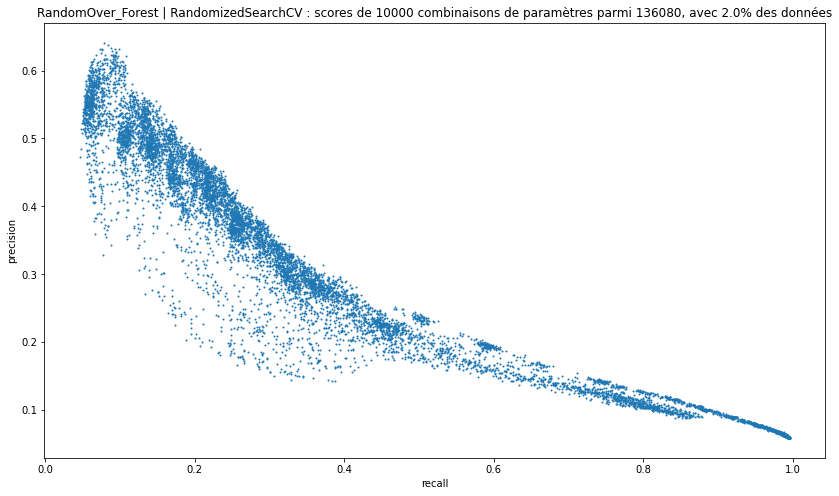

In [36]:
graph_2scores_CV(dico, results, 'recall', 'precision', s=1, pdf=pdf)

Export PDF : output/model_decision_tree/20.pdf



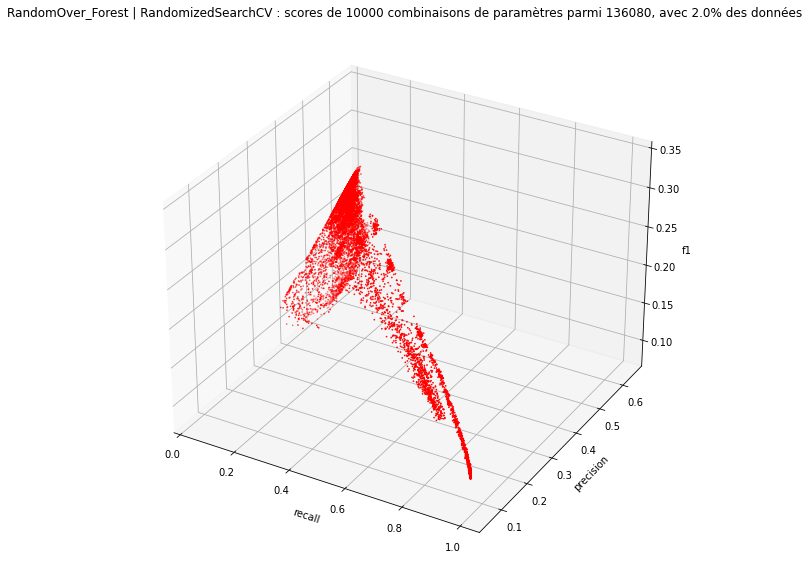

In [37]:
graph_3scores_CV(dico, results, 'recall', 'precision', 'f1', s=0.5, pdf=pdf)

Export PDF : output/model_decision_tree/21.pdf



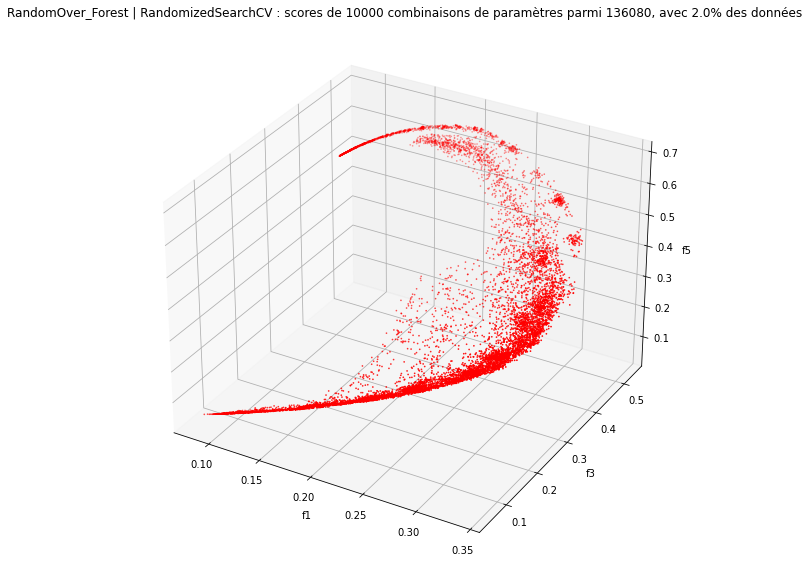

In [38]:
graph_3scores_CV(dico, results, 'f1', 'f3', 'f5', s=0.5, pdf=pdf)

Export PDF : output/model_decision_tree/22.pdf



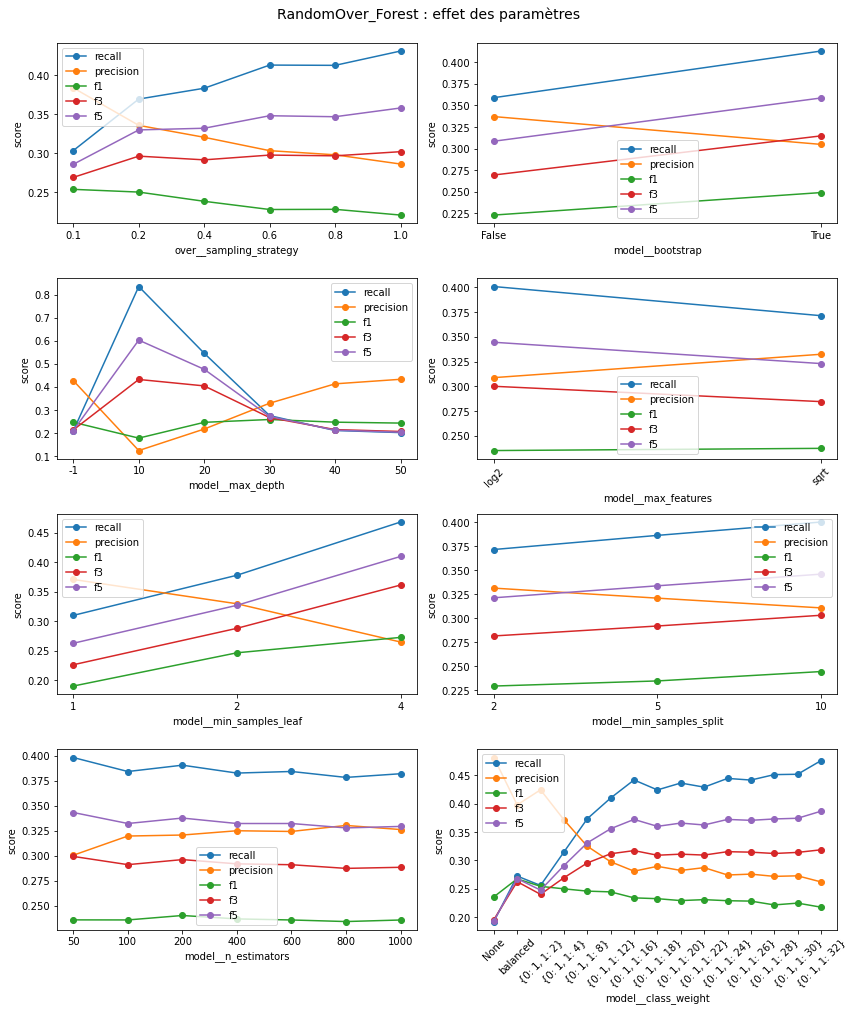

In [39]:
graph_param_CV(dico, results, ncols=2, height=3.5, width=6, pdf=pdf)

In [40]:
best_params = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_over__sampling_strategy,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
979,40.147479,0.559979,1.016336,0.047531,0.8,800,10,1,sqrt,10,...,7976,0.240481,0.00311,5382,0.528983,0.003032,1,0.648745,0.003234,743
7147,2.611673,0.443385,0.091172,0.017463,0.1,50,2,1,sqrt,10,...,7928,0.244158,0.004054,5237,0.526449,0.008678,2,0.640364,0.010936,1079
7574,36.093642,2.970123,1.260169,0.071785,0.1,1000,5,1,log2,10,...,8045,0.234425,0.00409,5601,0.526147,0.007961,3,0.65075,0.009859,678
5656,13.344011,1.678417,0.616193,0.096173,0.1,400,10,4,sqrt,10,...,7978,0.240072,0.002896,5400,0.52606,0.005755,4,0.644111,0.006942,933
7053,3.708672,0.731459,0.178202,0.038823,0.1,100,10,4,sqrt,10,...,7993,0.239147,0.003546,5444,0.525974,0.005895,5,0.645036,0.008226,883
5694,27.131808,2.541683,1.203881,0.256135,0.1,800,2,4,sqrt,10,...,8174,0.221826,0.003904,5998,0.525698,0.008388,6,0.666092,0.010709,399
5629,4.869185,0.968937,0.179243,0.042849,0.4,100,2,4,sqrt,10,...,8003,0.238287,0.004056,5483,0.525572,0.005701,7,0.645292,0.006564,866
2885,32.44277,5.127634,0.74964,0.059857,0.8,600,2,4,sqrt,10,...,8009,0.237758,0.003838,5505,0.525499,0.006252,8,0.645749,0.007297,842
7199,11.367632,1.56311,0.324566,0.057743,0.8,200,2,2,sqrt,10,...,8001,0.238327,0.00409,5481,0.525221,0.007033,9,0.644609,0.007799,909
2305,10.131406,1.99771,0.328757,0.070222,0.1,200,2,2,sqrt,10,...,7948,0.242547,0.003482,5293,0.525168,0.006888,10,0.639886,0.00848,1092


Meilleure combinaison de paramètres pour f3 :


{'over__sampling_strategy': 0.8,
 'model__n_estimators': 800,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 10,
 'model__class_weight': {0: 1, 1: 2},
 'model__bootstrap': True}

In [41]:
best_params['model__n_jobs'] = -1
best_params['model__n_estimators'] = 400
PARAMS[dico['model_name']] = best_params

Export PDF : output/model_decision_tree/23.pdf



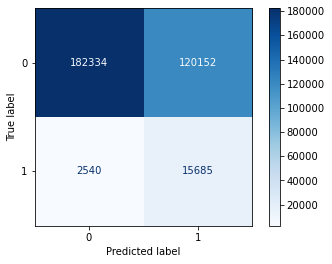

f1 : 0.2036
f3 : 0.5231
f5 : 0.6895
recall : 0.8606
negative predictive value : 0.9863
precision : 0.1155
roc_auc : 0.8275
training time : 2min, 39.735s
prediction time : 1.21s


In [42]:
m = Modelisation(X, y, pipeline.set_params(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

### 3.2. GridSearchCV avec SMOTE

### 3.3. Comparaison

In [43]:
dr1 = restauration_CV('Forest_CV_Randomized5000_57024_0.02', verbose=False)
dr2 = restauration_CV('RandomOver_Forest_CV_Randomized10000_136080_0.02', verbose=False)

Export PDF : output/model_decision_tree/24.pdf



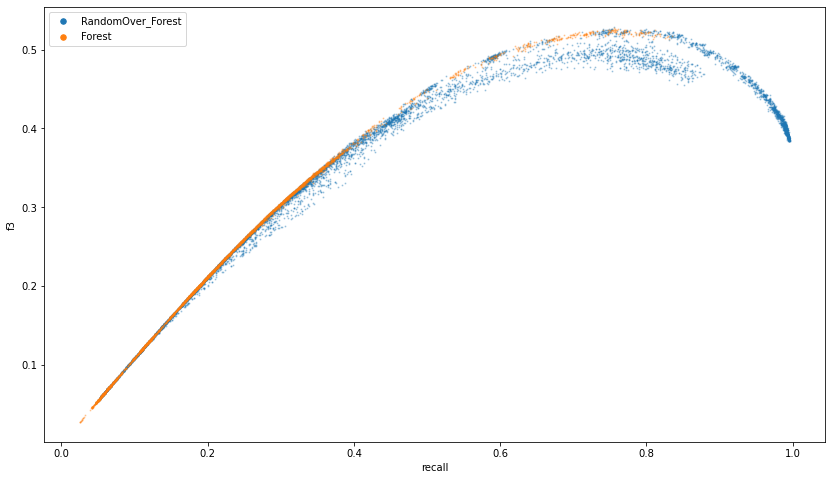

In [44]:
graph_2scores_CV_comp([dr2, dr1], 'recall', 'f3', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/25.pdf



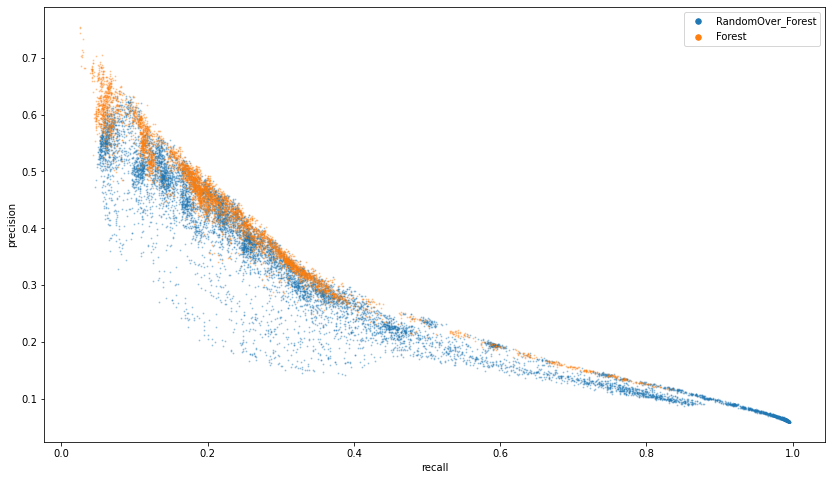

In [45]:
graph_2scores_CV_comp([dr2, dr1], 'recall', 'precision', s=[1, 1], alpha=0.3, pdf=pdf)

## 4. RandomForest avec RFECV
### 4.1. Sans oversampling

In [46]:
with open("backups/RFECV_Forest.json", 'r') as f:
    export = json.load(f)
    columns_quant_RFECV = export['columns_quant']
    columns_cat_RFECV = export['columns_cat']

In [47]:
model = RandomForestClassifier()

cv_params = {
    "bootstrap": [False, True],
    "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "max_features": ['sqrt', 'log2'],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [50, 100, 200, 400, 600, 800, 1000, 1500],
    "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:6}, {0:1, 1:8},
                     {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}, {0:1, 1:16}, {0:1, 1:18},
                     {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, {0:1, 1:26}, {0:1, 1:28},
                     {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

57024


In [48]:
# SearchCV(model, cv_params, columns_quant=columns_quant_RFECV, columns_cat=columns_cat_RFECV, data_frac=0.02, random=True, n_iter=5000, random_state=1234, n_jobs=28, name='RFECV')

In [49]:
dico, results = restauration_CV('Forest_RFECV_CV_Randomized5000_57024_0.02')

model : RandomForestClassifier()
model_name : Forest_RFECV
type : RandomizedSearchCV
len_grid : 57024
n_iter : 5000
columns_quant : ['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble', 'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour', 'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro']
columns_cat : ['is_interstitial_True']
drop : if_binary
data_frac : 0.02
n_jobs : 28
temps : 8h, 24min, 15.284s
params : {'bootstrap': [False, True], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1500], 'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 6}, {0: 1, 1: 8}, {0: 1, 1: 10}, {0: 1, 1: 12}, {0: 1, 1: 14}, {0: 1, 1: 16}, {0: 1, 1: 18}, {0: 1, 1: 20}, {0: 1, 1: 22}, {0: 1, 1: 24}, {0: 1, 1: 26}, {0: 1, 1: 28}, {0: 1, 1: 30}, {0: 1, 1: 32}]}
scoring : {'recall': 'recall', 'precision': 'p

In [50]:
best_params = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
3892,20.915714,0.162982,0.392375,0.003056,400,10,4,sqrt,10,"{0: 1, 1: 32}",...,4992,0.239578,0.001682,2940,0.516708,0.005132,1,0.628586,0.007604,2
2597,10.434058,0.174343,0.206804,0.005365,200,5,4,sqrt,10,"{0: 1, 1: 32}",...,4996,0.238848,0.002455,2964,0.516472,0.006258,2,0.628955,0.008534,1
2391,31.167993,0.296006,0.583419,0.005363,600,5,1,log2,10,"{0: 1, 1: 32}",...,4990,0.239465,0.001088,2946,0.5153,0.004075,3,0.626293,0.006005,4
494,44.607034,1.9939,0.781003,0.019658,800,10,1,sqrt,10,"{0: 1, 1: 32}",...,4995,0.238982,0.002467,2956,0.515053,0.006842,4,0.626396,0.009691,3
1632,81.034553,1.952537,1.521145,0.129993,1500,2,1,log2,10,"{0: 1, 1: 32}",...,4989,0.239527,0.001715,2944,0.514902,0.004296,5,0.625563,0.006597,5
2216,22.104745,0.808873,0.392329,0.002497,400,2,1,sqrt,10,"{0: 1, 1: 32}",...,4988,0.239623,0.001877,2936,0.514777,0.005122,6,0.625246,0.00748,6
4972,32.221302,1.92211,0.580253,0.005406,600,2,1,sqrt,10,"{0: 1, 1: 32}",...,4993,0.23915,0.002944,2951,0.513893,0.005788,7,0.624243,0.007746,8
213,35.578808,5.466957,0.616768,0.056665,600,5,4,log2,10,"{0: 1, 1: 30}",...,4983,0.242442,0.001397,2840,0.513561,0.005228,8,0.620291,0.007729,13
2745,23.103801,3.261705,0.417561,0.038603,400,2,2,log2,10,"{0: 1, 1: 32}",...,4994,0.238965,0.00177,2957,0.513506,0.006097,9,0.623773,0.008966,9
4798,5.622196,0.846867,0.11879,0.013156,100,2,4,log2,10,"{0: 1, 1: 30}",...,4980,0.242741,0.001961,2831,0.513383,0.006179,10,0.619688,0.00869,14


Meilleure combinaison de paramètres pour f3 :


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': {0: 1, 1: 32},
 'bootstrap': False}

In [51]:
best_params['n_jobs'] = -1
best_params['n_estimators'] = 400
PARAMS[dico['model_name']] = best_params

In [52]:
datasets_df_RFECV = datasets(df, columns_quant=columns_quant_RFECV, columns_cat=columns_cat_RFECV)
X_RFECV = datasets_df_RFECV['X']

Columns_quant : ['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble', 'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour', 'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro']
Columns_cat : ['is_interstitial_True']
drop : if_binary

Nombre de variables pour X_quant : 8



Index(['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble',
       'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 1



Index(['is_interstitial_True'], dtype='object')


Nombre de variables pour X : 9


Export PDF : output/model_decision_tree/26.pdf



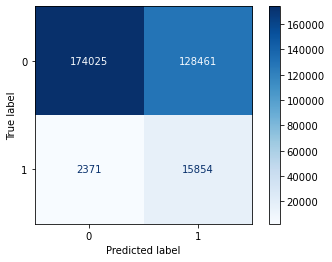

f1 : 0.1951
f3 : 0.5142
f5 : 0.6871
recall : 0.8699
negative predictive value : 0.9866
precision : 0.1099
roc_auc : 0.8292
training time : 1min, 25.122s
prediction time : 0.933s


In [53]:
m = Modelisation(X_RFECV, y, RandomForestClassifier(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

### 4.2. Avec oversampling

In [54]:
over = RandomOverSampler(random_state=1234)

pipeline = Pipeline_imb([('over', over),
                         ('model', RandomForestClassifier())
                         ])

cv_params = {
    "over__sampling_strategy": [0.1, 0.2, 0.4, 0.6, 0.8, 1],
    "model__bootstrap": [False, True],
    "model__max_depth": [10, 20, 30, 40, 50, None],
    "model__max_features": ['sqrt', 'log2'],
    "model__min_samples_leaf": [1, 2, 4],
    "model__min_samples_split": [2, 5, 10],
    "model__n_estimators": [50, 100, 200, 400, 600, 800, 1000],
    "model__class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:12}, 
                            {0:1, 1:16}, {0:1, 1:18}, {0:1, 1:20}, {0:1, 1:22}, {0:1, 1:24}, 
                            {0:1, 1:26}, {0:1, 1:28}, {0:1, 1:30}, {0:1, 1:32}] 
}

print(len(ParameterGrid(cv_params)))

136080


In [55]:
# SearchCV(pipeline, cv_params, columns_quant=columns_quant_RFECV, columns_cat=columns_cat_RFECV, data_frac=0.02, random=True, n_iter=10000, random_state=1234, n_jobs=28, name='RFECV')

In [56]:
dico, results = restauration_CV('RandomOver_Forest_RFECV_CV_Randomized10000_136080_0.02')

model : Pipeline(steps=[('over', RandomOverSampler(random_state=1234)),
                ('model', RandomForestClassifier())])
model_name : RandomOver_Forest_RFECV
type : RandomizedSearchCV
len_grid : 136080
n_iter : 10000
columns_quant : ['campaignctrlast24h', 'contextid', 'dayssincelastvisitdouble', 'display_size', 'nbdayssincelastclick', 'nbdisplay_1hour', 'nbdisplayglobalapprox_1d_sum_xdevice', 'zonecostineuro']
columns_cat : ['is_interstitial_True']
drop : if_binary
data_frac : 0.02
n_jobs : 28
temps : 20h, 50min, 50.531s
params : {'over__sampling_strategy': [0.1, 0.2, 0.4, 0.6, 0.8, 1], 'model__bootstrap': [False, True], 'model__max_depth': [10, 20, 30, 40, 50, None], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [1, 2, 4], 'model__min_samples_split': [2, 5, 10], 'model__n_estimators': [50, 100, 200, 400, 600, 800, 1000], 'model__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 8}, {0: 1, 1: 12}, {0: 1, 1: 16}, {0: 1, 1: 18}, {0: 1, 1: 

In [57]:
best_params = best_score_CV(dico, results, 'f3')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_over__sampling_strategy,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,...,rank_test_precision,mean_test_f1,std_test_f1,rank_test_f1,mean_test_f3,std_test_f3,rank_test_f3,mean_test_f5,std_test_f5,rank_test_f5
2496,64.136955,10.382066,1.022495,0.113816,1.0,1000,5,4,sqrt,10,...,8528,0.241462,0.004828,5279,0.521283,0.008313,1,0.634429,0.010292,1176
8563,49.104917,4.961371,0.834846,0.078608,1.0,800,10,4,log2,10,...,8530,0.241278,0.003809,5287,0.520682,0.008693,2,0.633589,0.01175,1180
8410,17.663366,2.851828,0.416032,0.044721,0.1,400,10,4,sqrt,10,...,8737,0.228352,0.003272,5928,0.520341,0.004709,3,0.647794,0.00519,952
6620,26.271906,2.887058,0.640982,0.076952,0.1,600,2,4,sqrt,10,...,8677,0.231949,0.002694,5740,0.519746,0.005332,4,0.642387,0.007153,1098
9033,2.136613,0.355493,0.07083,0.009445,0.2,50,5,4,sqrt,10,...,8594,0.237714,0.0029,5434,0.519707,0.007965,5,0.635761,0.011412,1168
4785,46.259482,7.014281,1.049348,0.104064,0.2,1000,5,4,sqrt,10,...,8595,0.23766,0.00386,5439,0.519465,0.007666,6,0.635381,0.009314,1172
7524,61.371026,4.424479,0.977631,0.025773,1.0,1000,10,1,sqrt,10,...,8534,0.240889,0.004175,5300,0.519434,0.008042,7,0.631877,0.010587,1192
8690,42.502503,3.541961,0.876188,0.102144,0.6,800,10,4,sqrt,10,...,8714,0.229948,0.001455,5841,0.519369,0.004237,8,0.644099,0.006317,1064
2398,50.078469,4.227943,0.917528,0.097266,0.6,800,2,4,log2,10,...,8706,0.230128,0.003742,5829,0.519136,0.006385,9,0.643479,0.007538,1077
2220,25.10598,3.441269,0.631881,0.063825,0.2,600,10,4,log2,10,...,8843,0.220471,0.001772,6405,0.518928,0.005814,10,0.655438,0.008377,605


Meilleure combinaison de paramètres pour f3 :


{'over__sampling_strategy': 1,
 'model__n_estimators': 1000,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 4,
 'model__max_features': 'sqrt',
 'model__max_depth': 10,
 'model__class_weight': {0: 1, 1: 2},
 'model__bootstrap': True}

In [58]:
best_params['model__n_jobs'] = -1
best_params['model__n_estimators'] = 400
PARAMS[dico['model_name']] = best_params
with open("backups/PARAMS_Forest.json", 'w') as f:
    json.dump(PARAMS, f, indent=2)

Export PDF : output/model_decision_tree/27.pdf



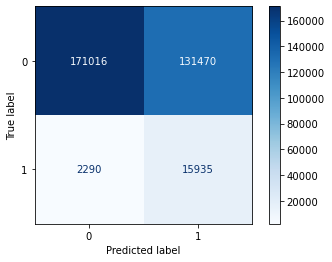

f1 : 0.1924
f3 : 0.5117
f5 : 0.6870
recall : 0.8743
negative predictive value : 0.9868
precision : 0.1081
roc_auc : 0.8293
training time : 2min, 18.125s
prediction time : 0.958s


In [59]:
m = Modelisation(X_RFECV, y, pipeline.set_params(**best_params))
m.show_conf_matrix(pdf=pdf)
m.show_metrics_score()

metrics = m.metrics_score
metrics['model_name'] = dico['model_name']
metrics['training_time'] = m.training_time
metrics['prediction_time'] = m.prediction_time
SCORES.append(metrics)

### 4.3. Comparaison

In [60]:
dr1 = restauration_CV('Forest_CV_Randomized5000_57024_0.02', verbose=False)
dr2 = restauration_CV('Forest_RFECV_CV_Randomized5000_57024_0.02', verbose=False)
dr3 = restauration_CV('RandomOver_Forest_CV_Randomized10000_136080_0.02', verbose=False)
dr4 = restauration_CV('RandomOver_Forest_RFECV_CV_Randomized10000_136080_0.02', verbose=False)

Export PDF : output/model_decision_tree/28.pdf



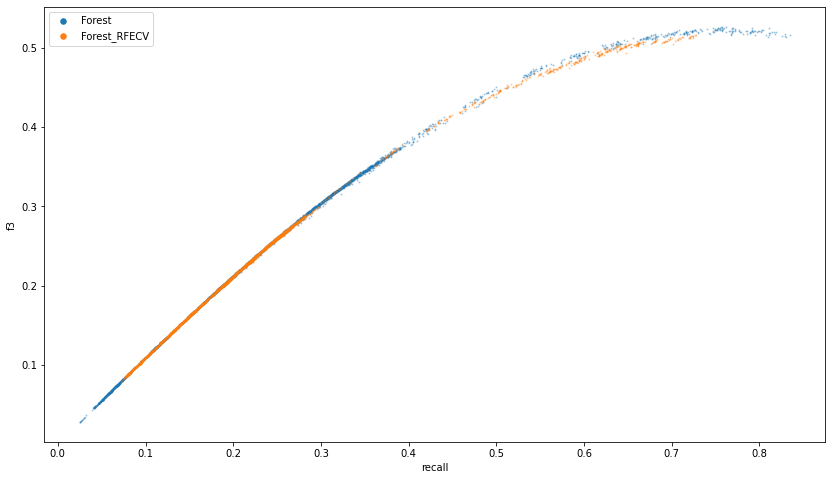

In [61]:
graph_2scores_CV_comp([dr1, dr2], 'recall', 'f3', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/29.pdf



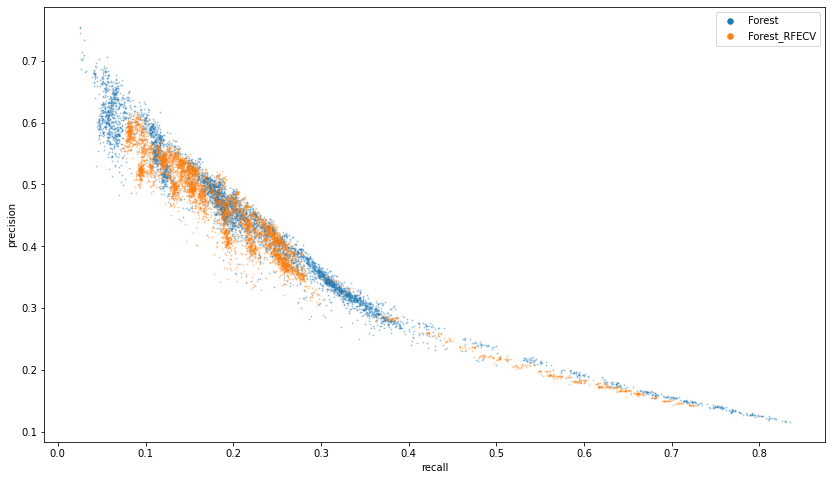

In [62]:
graph_2scores_CV_comp([dr1, dr2], 'recall', 'precision', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/30.pdf



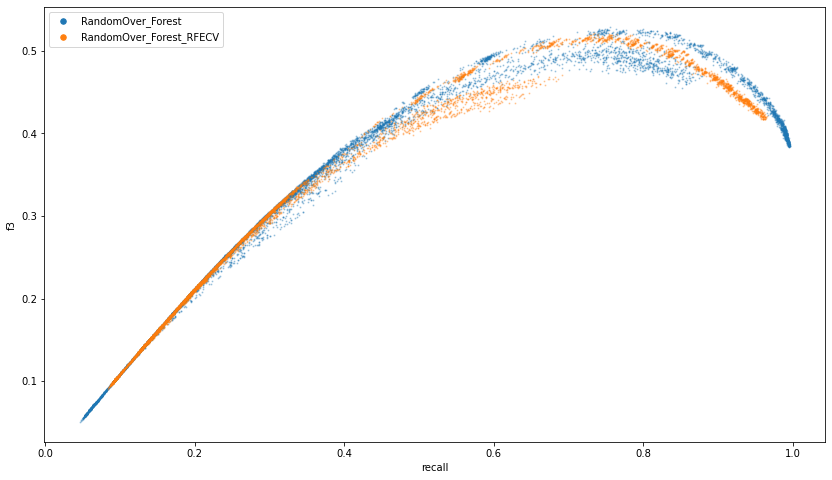

In [63]:
graph_2scores_CV_comp([dr3, dr4], 'recall', 'f3', s=[1, 1], alpha=0.3, pdf=pdf)

Export PDF : output/model_decision_tree/31.pdf



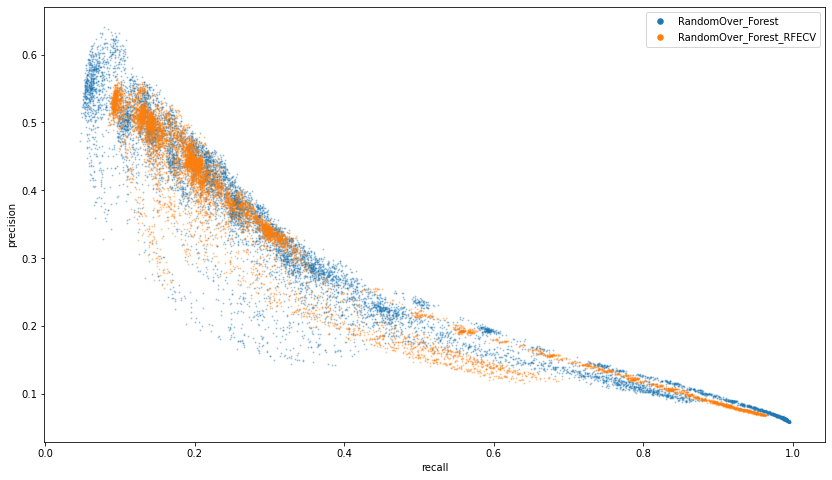

In [64]:
graph_2scores_CV_comp([dr3, dr4], 'recall', 'precision', s=[1, 1], alpha=0.3, pdf=pdf)

In [65]:
scores_df = pd.DataFrame(SCORES).set_index('model_name')
a = scores_df.columns.tolist()
a.remove('training_time')
a.remove('prediction_time')
scores_df.sort_values(by='f3', ascending=False).to_csv('backups/SCORES_Forest.csv')
scores_df.sort_values(by='f3', ascending=False).style.background_gradient(cmap='Blues', subset=a).background_gradient(cmap='Blues_r', subset=['training_time', 'prediction_time'])

,f1,f3,f5,recall,negative predictive value,precision,roc_auc,training_time,prediction_time
model_name,,,,,,,,,
Forest,0.205183,0.524000,0.688612,0.856845,0.986027,0.116546,0.827393,121.334532,1.230920
RandomOver_Forest,0.203619,0.523074,0.689495,0.860631,0.986261,0.115469,0.827507,159.734535,1.210137
Forest_RFECV,0.195078,0.514173,0.687075,0.869904,0.986559,0.109857,0.829225,85.122177,0.933126
RandomOver_Forest_RFECV,0.192417,0.511672,0.687047,0.874348,0.986786,0.108104,0.829303,138.124535,0.958005


In [66]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:13:09
